In [1]:
import os

from stable_baselines3 import PPO
from random_agent import RandomAgent

# Run ID
model_id = "200kJaccard1e-3PreviousActions.zip" 

# Model path
model_path = f"models/{model_id}"

# Load the model
loaded_model = PPO.load(model_path)



/Users/nicoberlaender/Development/ADLR/.conda/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
/Users/nicoberlaender/Development/ADLR/.conda/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(


In [3]:
#Enviroment set up
from cnn_environment_previous_actions import TestEnvironment2

current_path = os.getcwd()
parent_path = os.path.dirname(current_path)
data_path = os.path.join(parent_path, "data_new")

env = TestEnvironment2((224, 224), 15, data_path, render_mode = 'human')
random_agent = RandomAgent(env)



/Users/nicoberlaender/Development/ADLR/Reinforcement_Learning/cnn_environment_previous_actions.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.unet = torch.load("s

Starting environment rendering for 5 episodes...


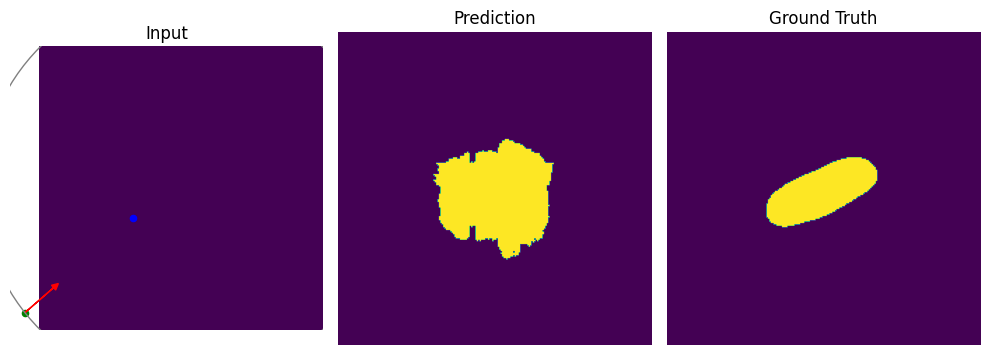

Current similarity : 0.4662786028771018
Episode 1:
  Action Taken: [0.7137348  0.07425837]
  Reward Received: 0.4662786028771018
  Done: False, Truncated: False


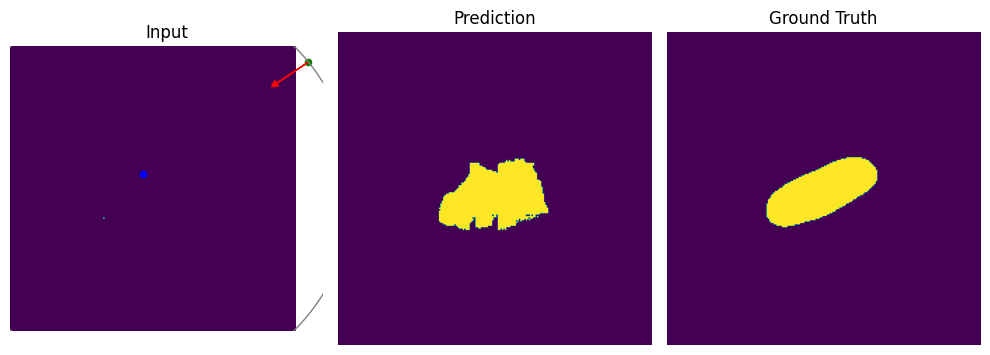

Current similarity : 0.6925901199290421
Episode 1:
  Action Taken: [-0.28322753 -0.14583097]
  Reward Received: 0.6925901199290421
  Done: False, Truncated: False


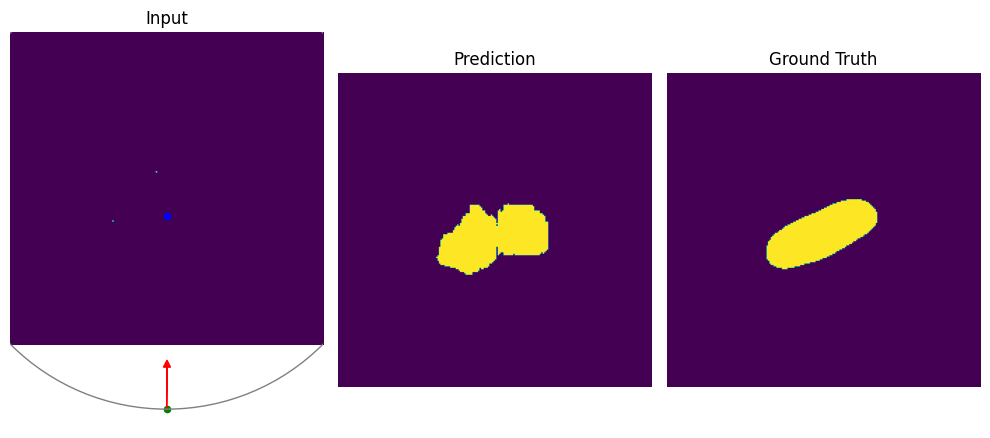

Current similarity : 0.7311827954453061
Episode 1:
  Action Taken: [-1.         -0.01139616]
  Reward Received: 0.7311827954453061
  Done: False, Truncated: False


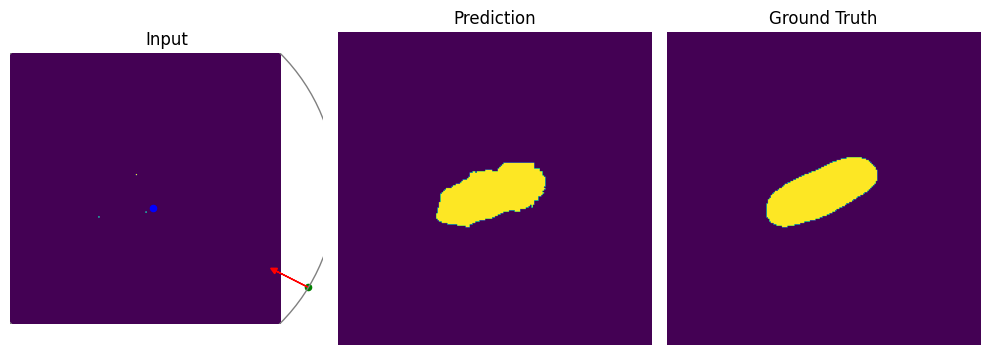

Current similarity : 0.8508702528279786
Episode 1:
  Action Taken: [-0.67392087  0.1249286 ]
  Reward Received: 0.8508702528279786
  Done: False, Truncated: False


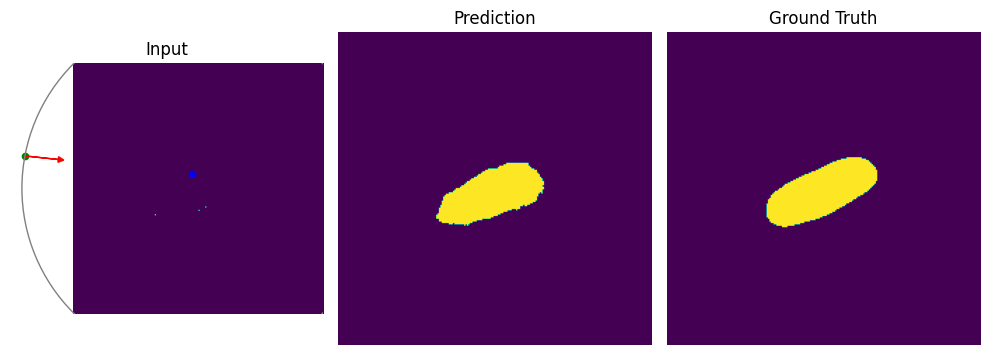

Current similarity : 0.8308070459521479
Episode 1:
  Action Taken: [0.4411124  0.12648298]
  Reward Received: 0.8308070459521479
  Done: False, Truncated: False


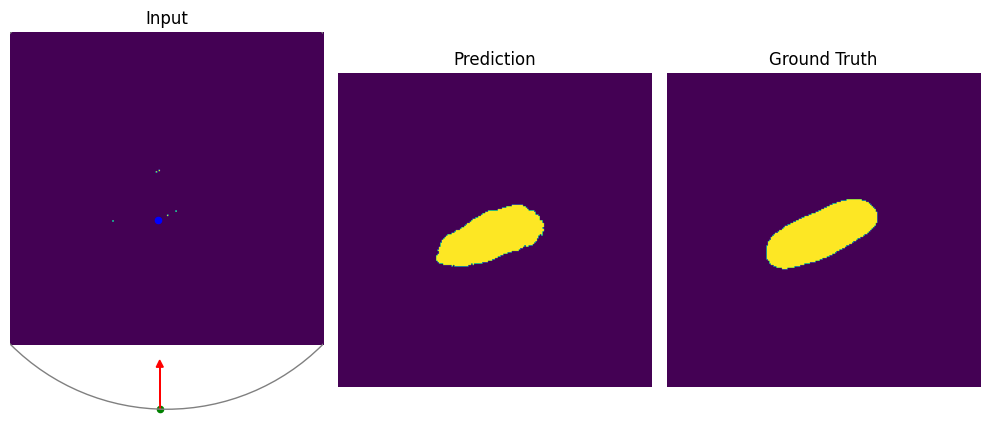

Current similarity : 0.8289581620882043
Episode 1:
  Action Taken: [0.9907957  0.06699771]
  Reward Received: 0.8289581620882043
  Done: False, Truncated: False


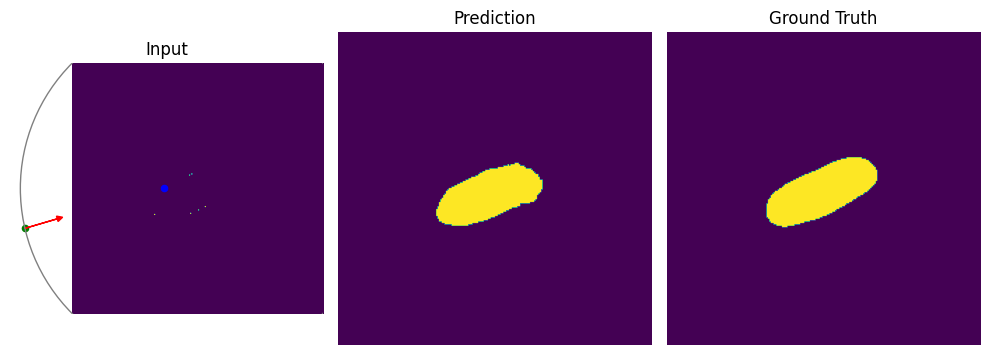

Current similarity : 0.8520661153503859
Episode 1:
  Action Taken: [0.5724922 0.09467  ]
  Reward Received: 0.8520661153503859
  Done: False, Truncated: False


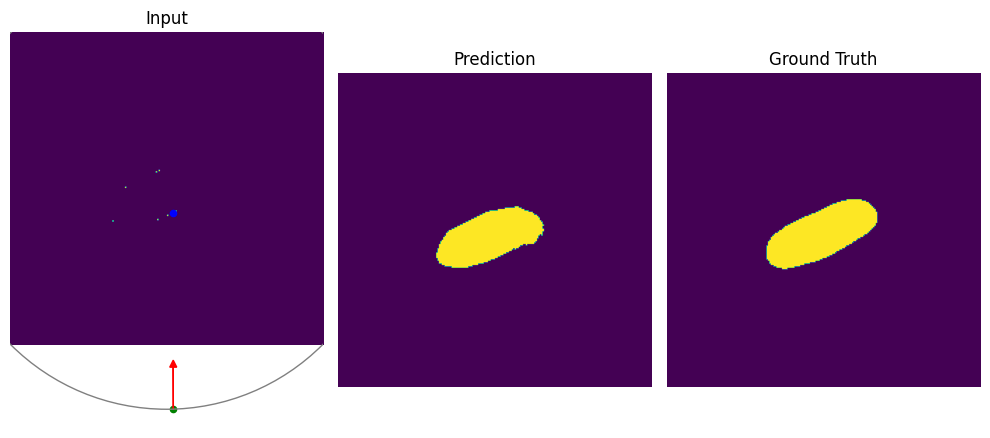

Current similarity : 0.84946236524009
Episode 1:
  Action Taken: [-0.990383   -0.04564438]
  Reward Received: 0.84946236524009
  Done: False, Truncated: False


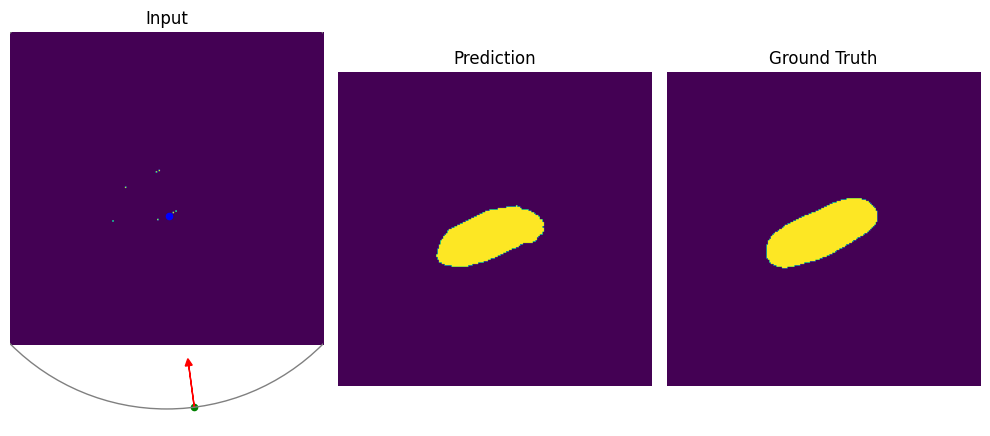

Current similarity : 0.8461538458039066
Episode 1:
  Action Taken: [-0.960001    0.01156413]
  Reward Received: 0.8461538458039066
  Done: False, Truncated: False


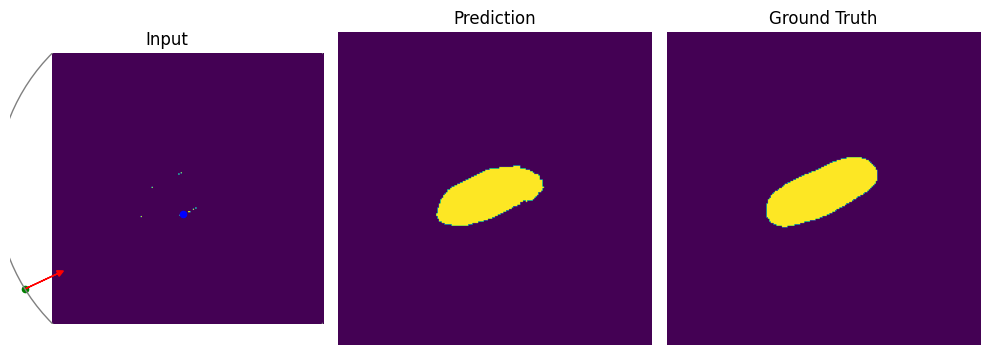

Current similarity : 0.8471177941323652
Episode 1:
  Action Taken: [ 0.67637366 -0.18865967]
  Reward Received: 0.8471177941323652
  Done: False, Truncated: False


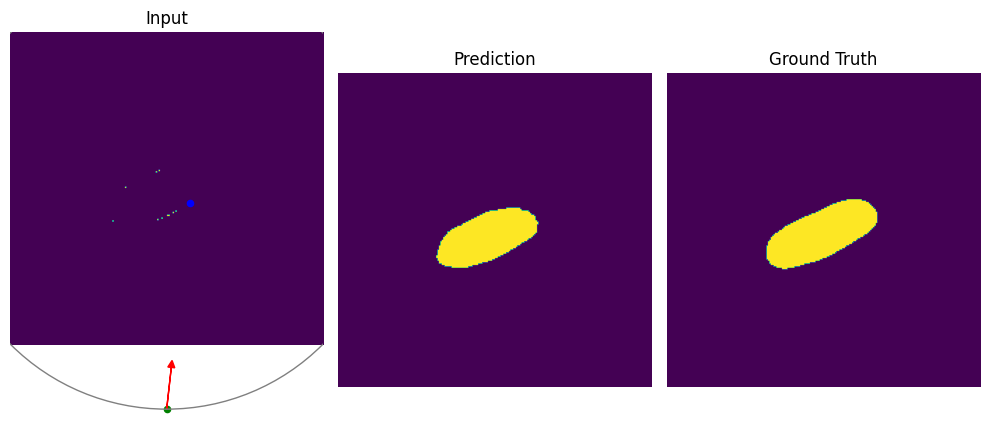

Current similarity : 0.8455663976047662
Episode 1:
  Action Taken: [ 1.         -0.17950517]
  Reward Received: 0.8455663976047662
  Done: False, Truncated: False


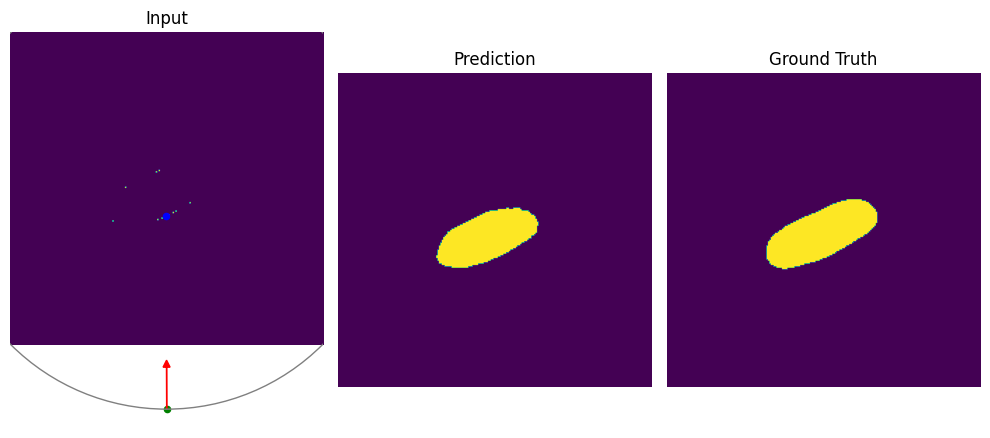

Current similarity : 0.845076400320426
Episode 1:
  Action Taken: [1.         0.00329458]
  Reward Received: 0.845076400320426
  Done: False, Truncated: False


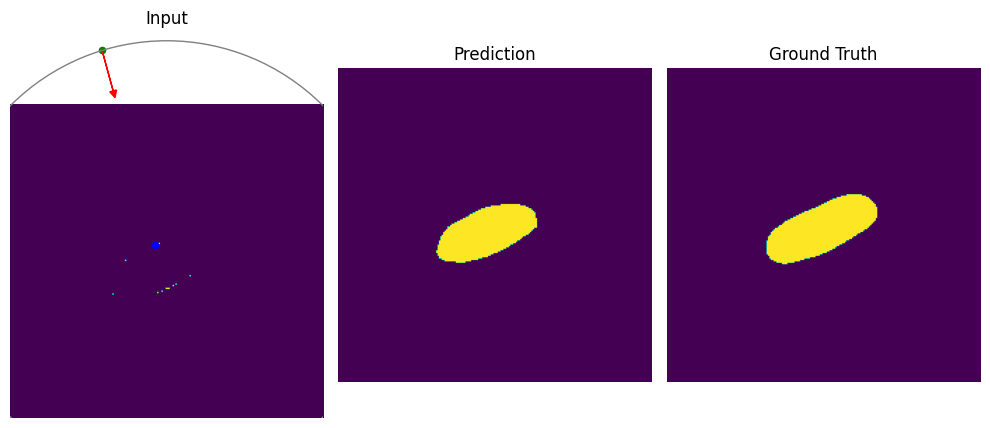

Current similarity : 0.8347493624321372
Episode 1:
  Action Taken: [ 0.09457886 -0.04876148]
  Reward Received: 0.8347493624321372
  Done: False, Truncated: False


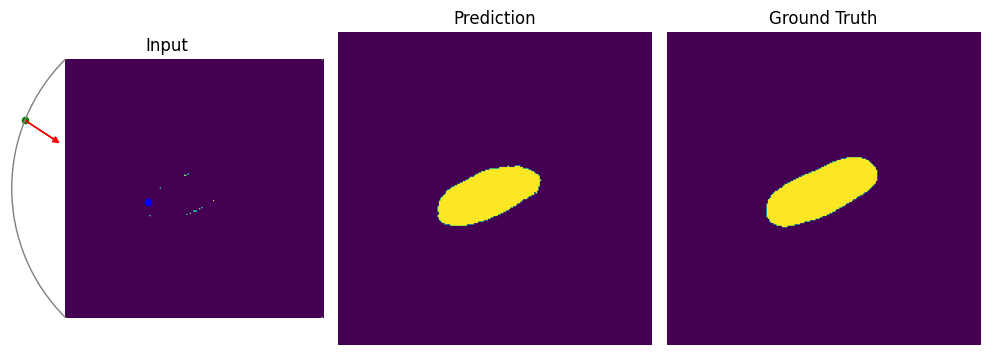

Current similarity : 0.8590233541999901
Episode 1:
  Action Taken: [ 0.37811905 -0.32142714]
  Reward Received: 0.8590233541999901
  Done: False, Truncated: False


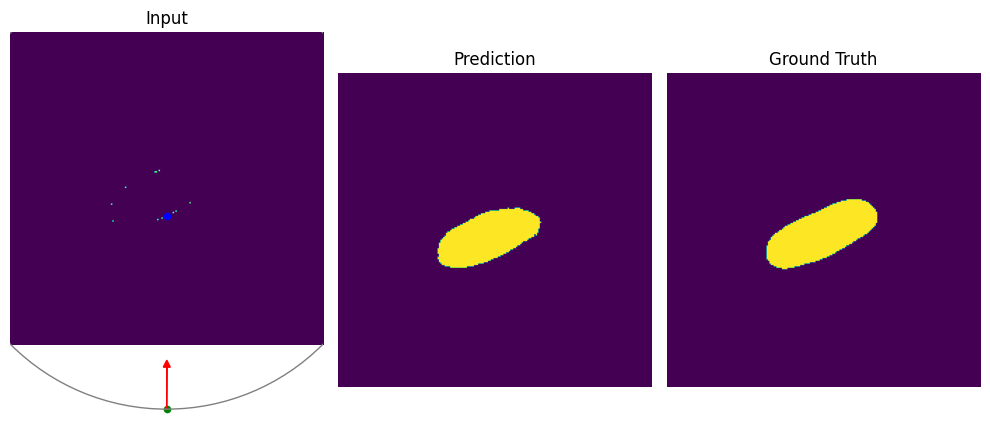

Current similarity : 0.8590233541999901
Episode 1:
  Action Taken: [ 1.         -0.00488491]
  Reward Received: 0.8590233541999901
  Done: True, Truncated: False
Episode 1 finished. Resetting environment...


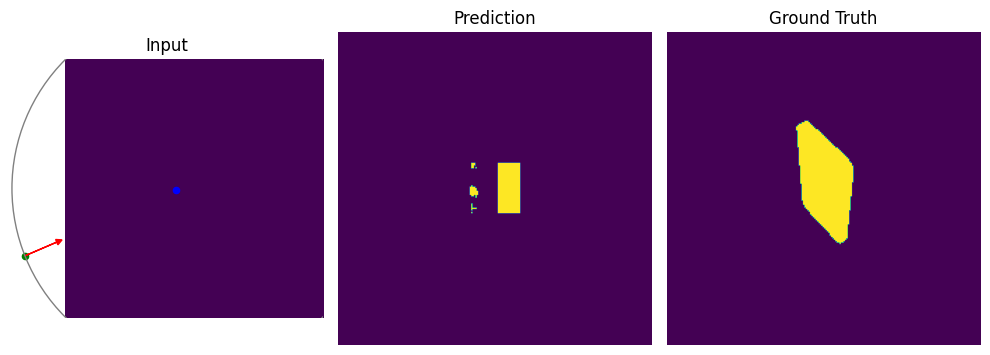

Current similarity : 0.25781910386398177
Episode 2:
  Action Taken: [0.62088656 0.04290188]
  Reward Received: 0.25781910386398177
  Done: False, Truncated: False


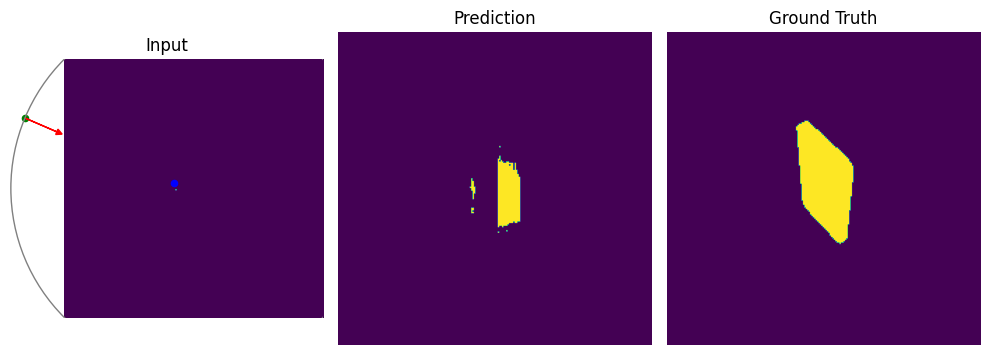

Current similarity : 0.30080610933355706
Episode 2:
  Action Taken: [ 0.37425292 -0.02208783]
  Reward Received: 0.30080610933355706
  Done: False, Truncated: False


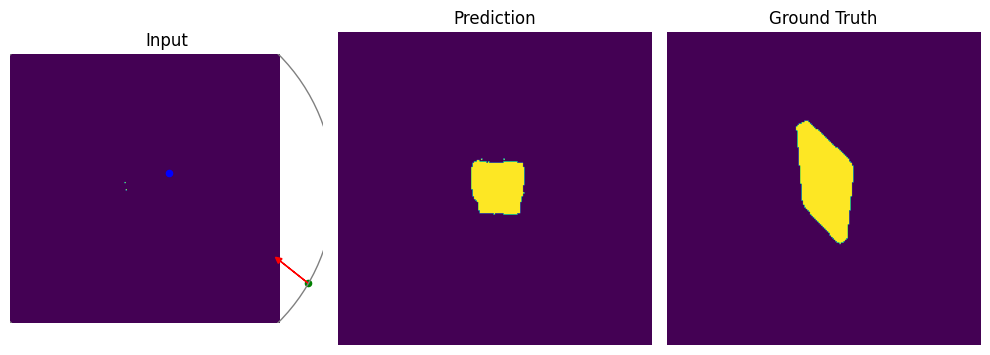

Current similarity : 0.5495533813060173
Episode 2:
  Action Taken: [-0.66738015 -0.23540498]
  Reward Received: 0.5495533813060173
  Done: False, Truncated: False


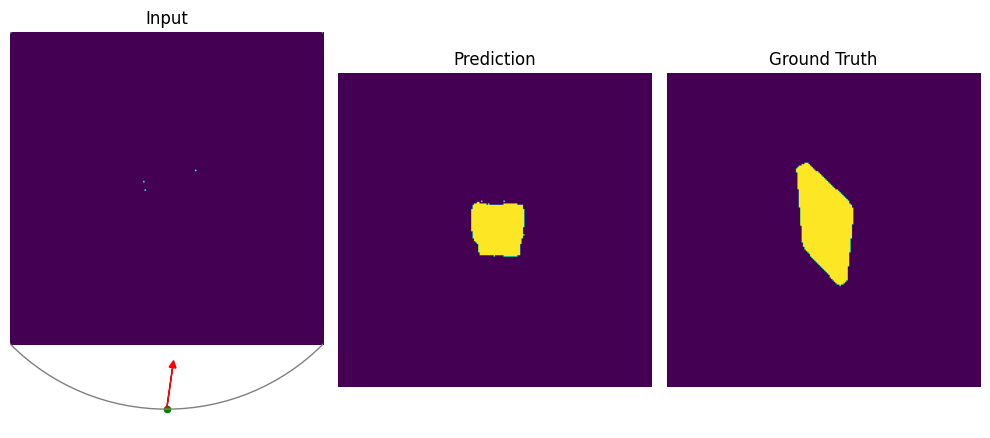

Current similarity : 0.5495533813060173
Episode 2:
  Action Taken: [-1.        -0.2296084]
  Reward Received: 0
  Done: False, Truncated: False


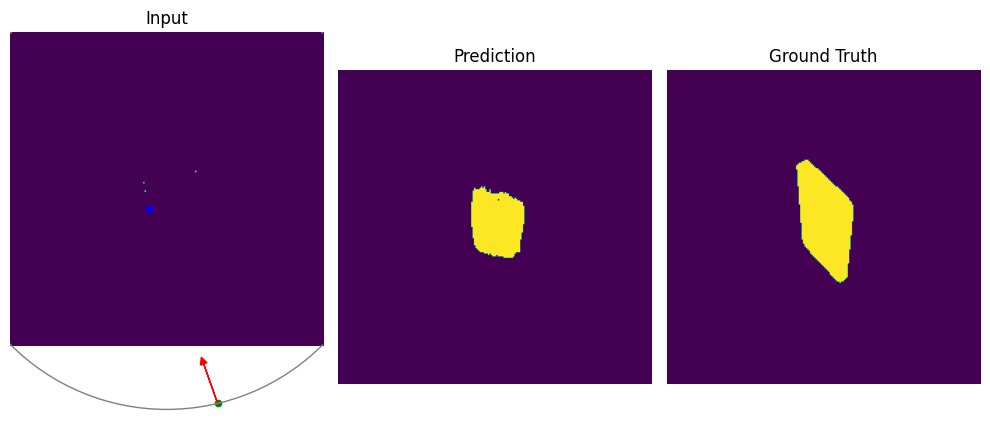

Current similarity : 0.6612834676322638
Episode 2:
  Action Taken: [-0.92573315  0.17290087]
  Reward Received: 0.6612834676322638
  Done: False, Truncated: False


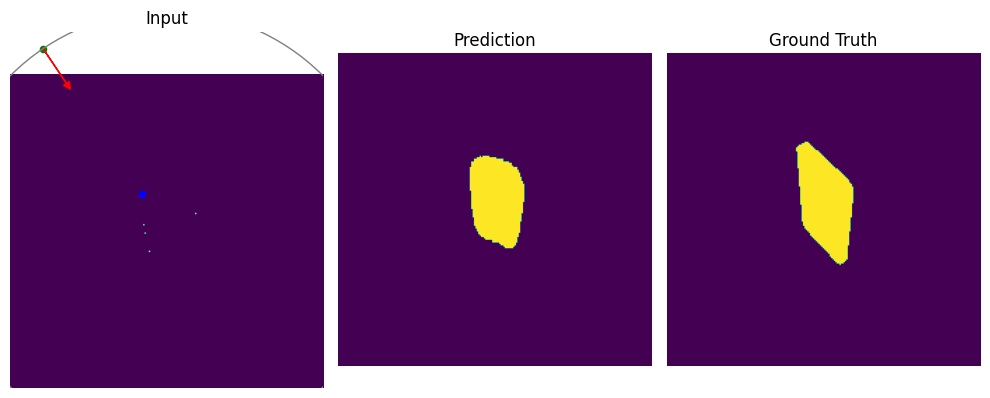

Current similarity : 0.8114989729726904
Episode 2:
  Action Taken: [ 0.1892925  -0.00340353]
  Reward Received: 0.8114989729726904
  Done: False, Truncated: False


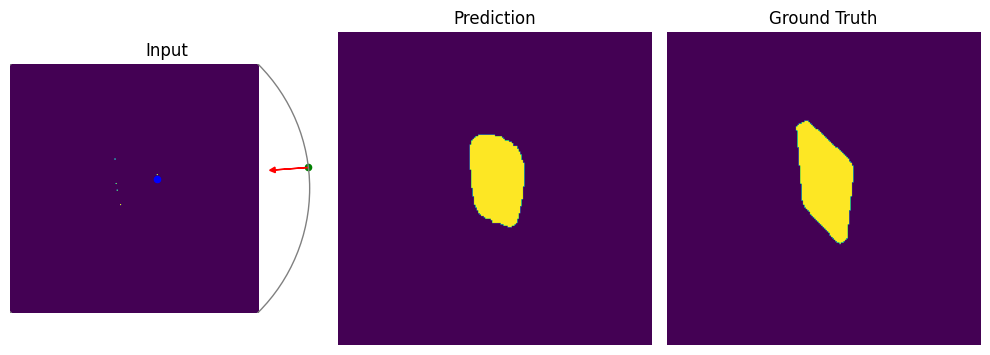

Current similarity : 0.8173273392654976
Episode 2:
  Action Taken: [-0.46199524 -0.07588575]
  Reward Received: 0.8173273392654976
  Done: False, Truncated: False


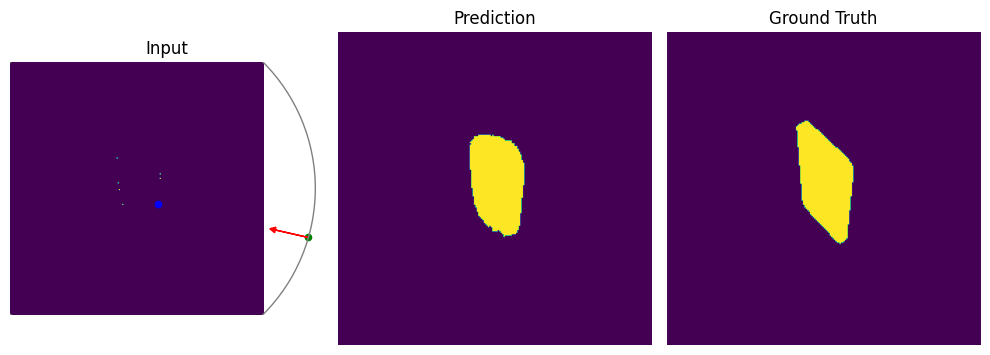

Current similarity : 0.8558811718764027
Episode 2:
  Action Taken: [-0.5888121   0.09034278]
  Reward Received: 0.8558811718764027
  Done: False, Truncated: False


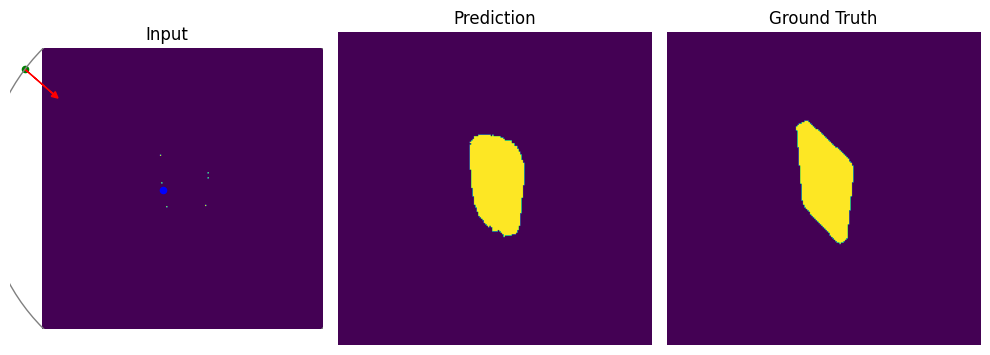

Current similarity : 0.8558811718764027
Episode 2:
  Action Taken: [ 0.29434848 -0.11632026]
  Reward Received: 0.8558811718764027
  Done: False, Truncated: False


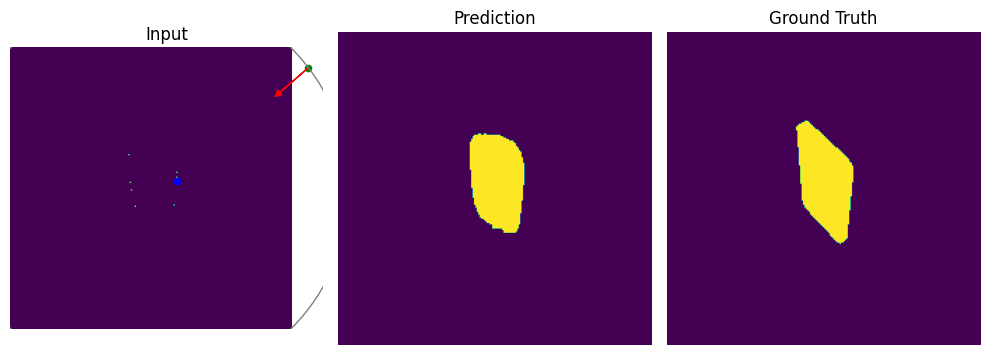

Current similarity : 0.8495788203571686
Episode 2:
  Action Taken: [-0.29194272  0.09802067]
  Reward Received: 0.8495788203571686
  Done: False, Truncated: False


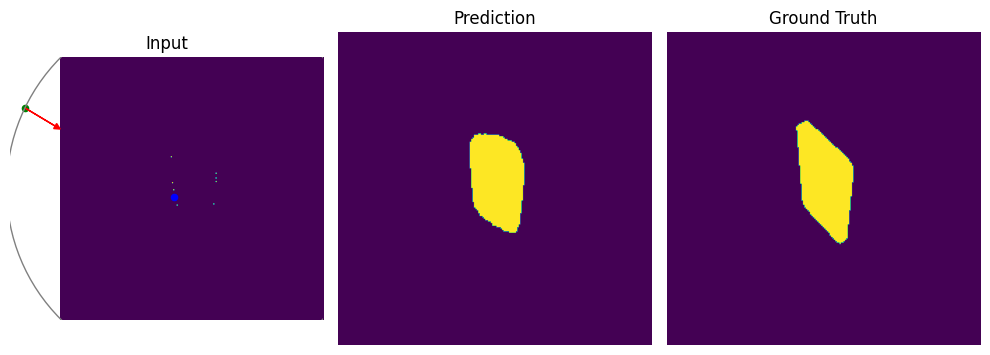

Current similarity : 0.8509090905652893
Episode 2:
  Action Taken: [ 0.3570519  -0.14733848]
  Reward Received: 0.8509090905652893
  Done: False, Truncated: False


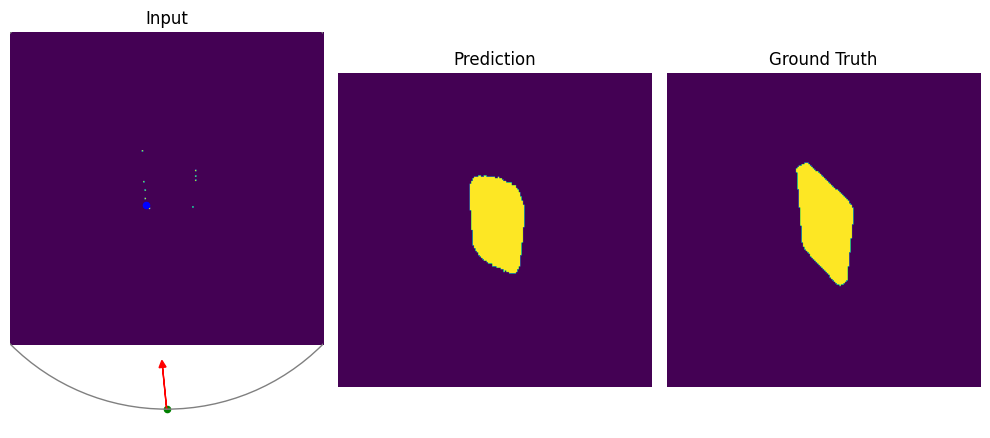

Current similarity : 0.8462474641597374
Episode 2:
  Action Taken: [1.         0.15913346]
  Reward Received: 0.8462474641597374
  Done: False, Truncated: False


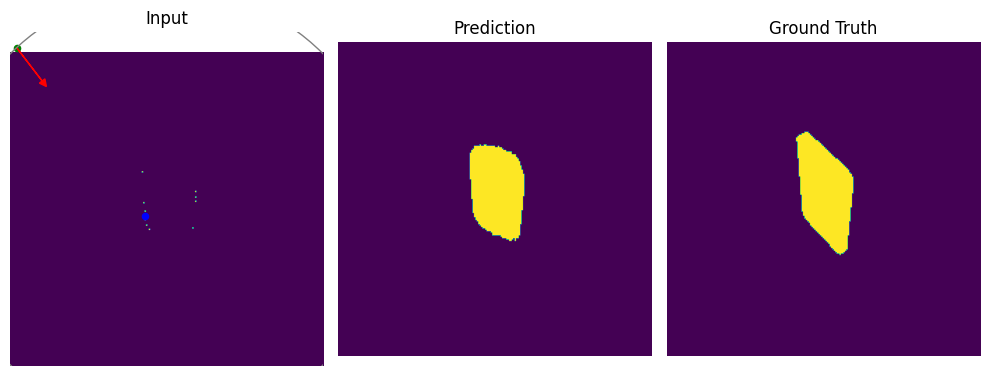

Current similarity : 0.837936636540237
Episode 2:
  Action Taken: [ 0.23815084 -0.15318783]
  Reward Received: 0.837936636540237
  Done: False, Truncated: False


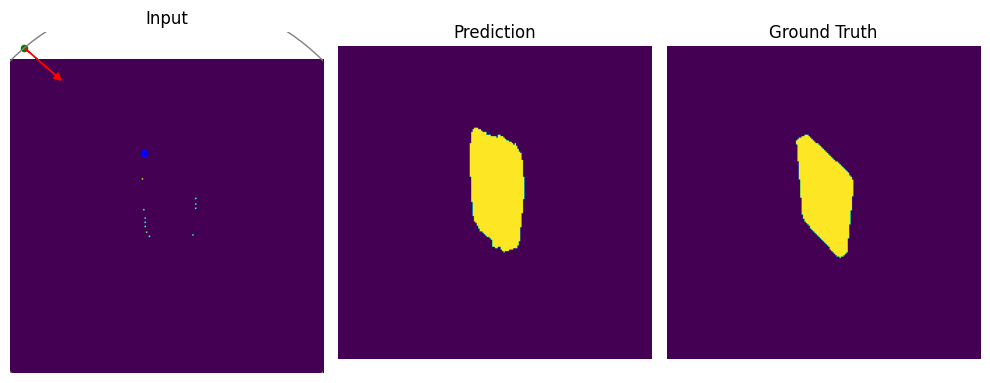

Current similarity : 0.8141117475594156
Episode 2:
  Action Taken: [0.2232936  0.24204153]
  Reward Received: 0.8141117475594156
  Done: False, Truncated: False


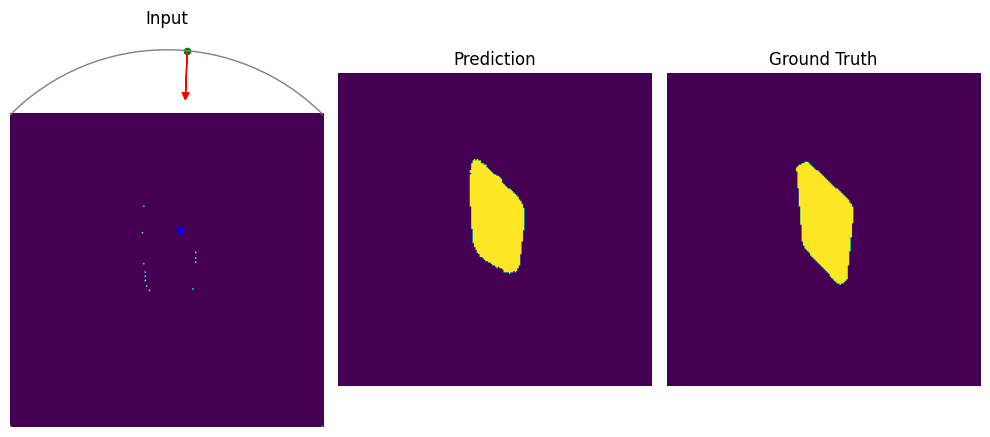

Current similarity : 0.911643269648372
Episode 2:
  Action Taken: [-0.02967206  0.09050016]
  Reward Received: 0.911643269648372
  Done: True, Truncated: False
Episode 2 finished. Resetting environment...


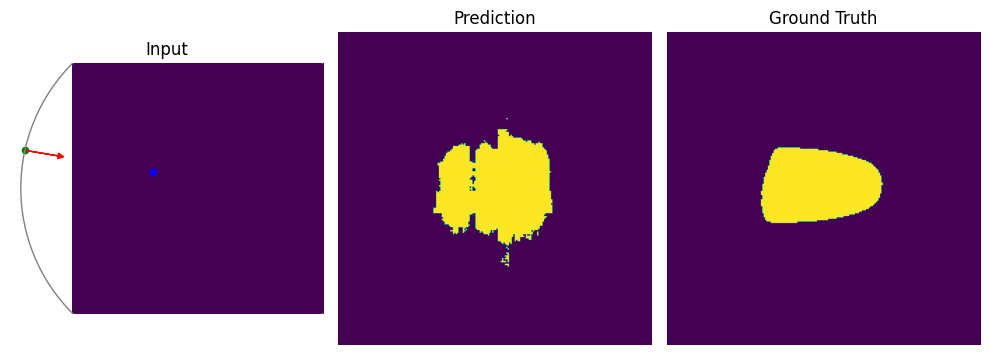

Current similarity : 0.6904438843399023
Episode 3:
  Action Taken: [0.43106338 0.08124579]
  Reward Received: 0.6904438843399023
  Done: False, Truncated: False


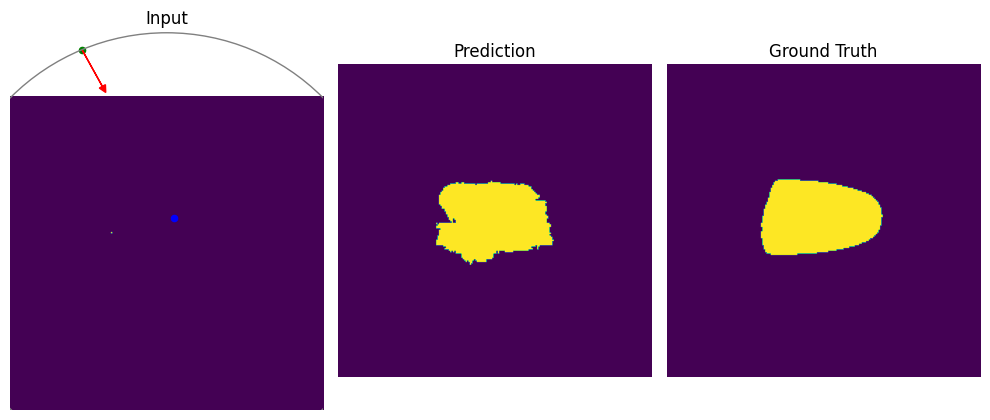

Current similarity : 0.8293099242064593
Episode 3:
  Action Taken: [0.12541932 0.18299475]
  Reward Received: 0.8293099242064593
  Done: False, Truncated: False


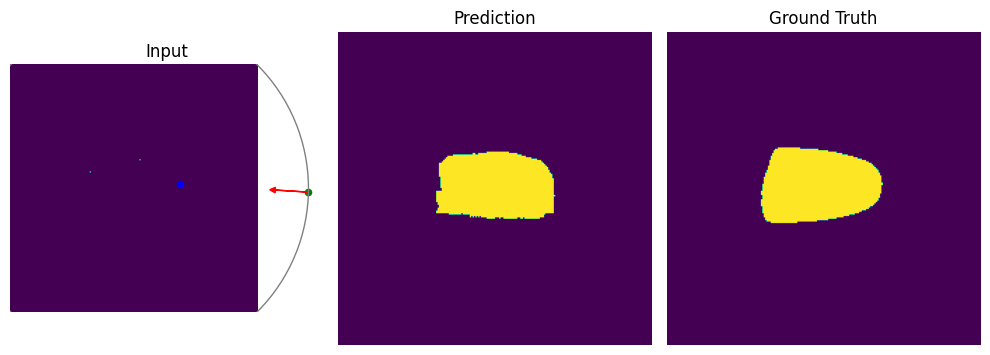

Current similarity : 0.8331257781237545
Episode 3:
  Action Taken: [-0.50691265 -0.06549168]
  Reward Received: 0.8331257781237545
  Done: False, Truncated: False


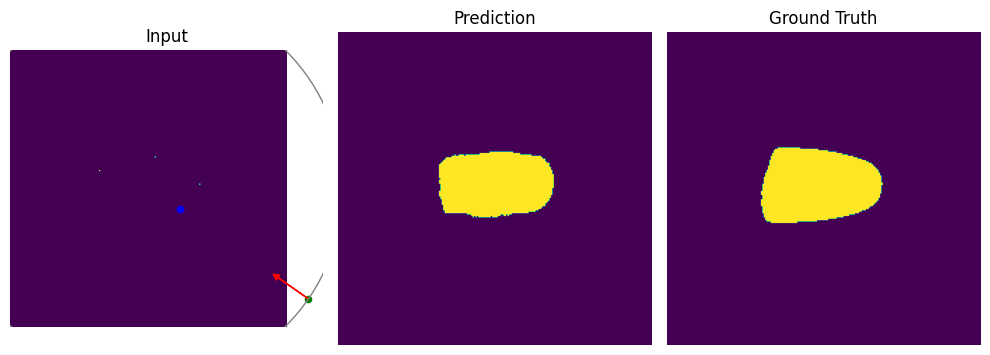

Current similarity : 0.8251086676489111
Episode 3:
  Action Taken: [-0.6922694  -0.01113332]
  Reward Received: 0.8251086676489111
  Done: False, Truncated: False


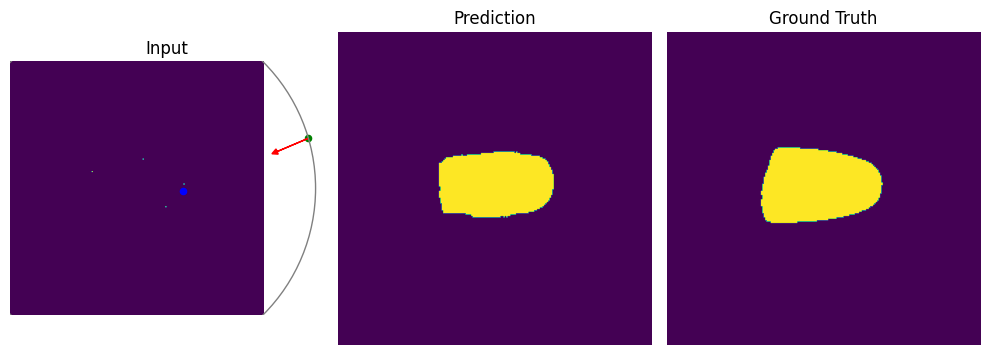

Current similarity : 0.8297110711251059
Episode 3:
  Action Taken: [-0.40957135  0.19150072]
  Reward Received: 0.8297110711251059
  Done: False, Truncated: False


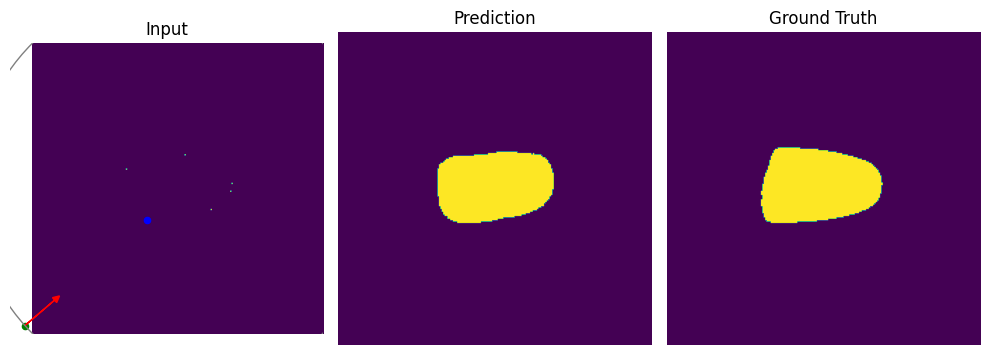

Current similarity : 0.8701265820581958
Episode 3:
  Action Taken: [ 0.73308384 -0.03847353]
  Reward Received: 0.8701265820581958
  Done: False, Truncated: False


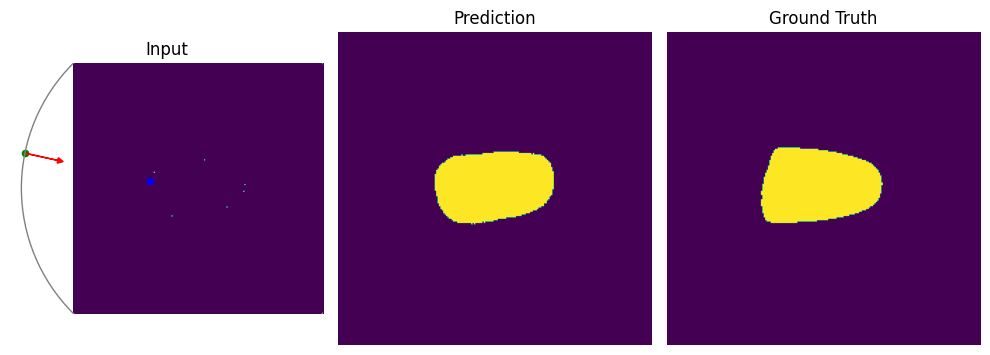

Current similarity : 0.8764186630828705
Episode 3:
  Action Taken: [ 0.43618405 -0.02633677]
  Reward Received: 0.8764186630828705
  Done: False, Truncated: False


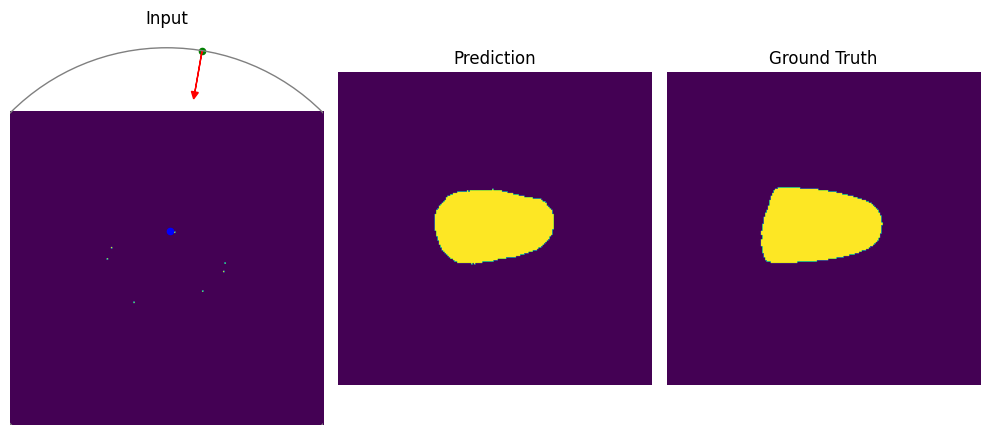

Current similarity : 0.9144550371258813
Episode 3:
  Action Taken: [-0.05141069 -0.01990332]
  Reward Received: 0.9144550371258813
  Done: False, Truncated: False


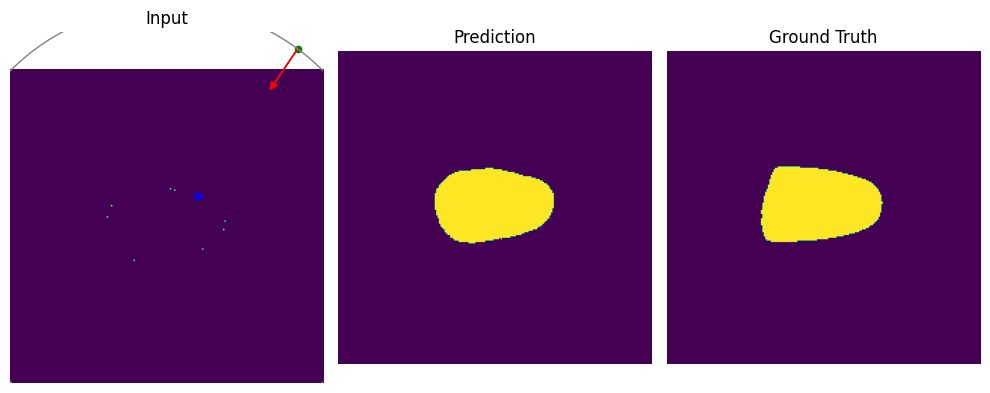

Current similarity : 0.9128641400069956
Episode 3:
  Action Taken: [-0.20233932  0.07042132]
  Reward Received: 0.9128641400069956
  Done: False, Truncated: False


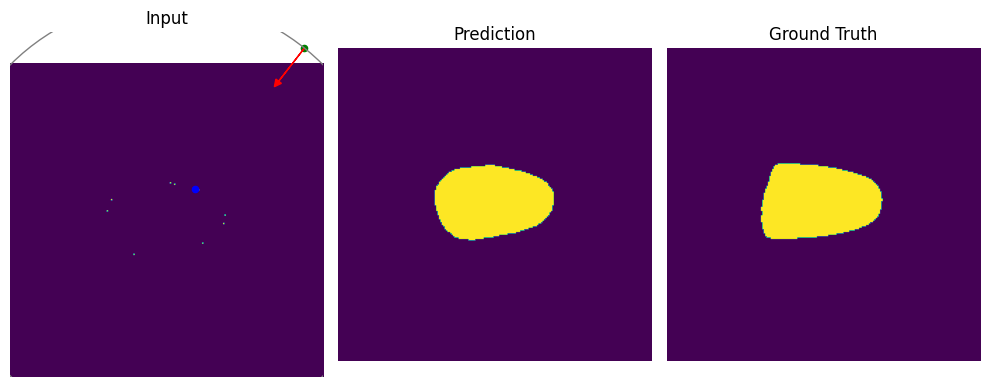

Current similarity : 0.9151138713987801
Episode 3:
  Action Taken: [-0.21473695  0.02150825]
  Reward Received: 0.9151138713987801
  Done: False, Truncated: False


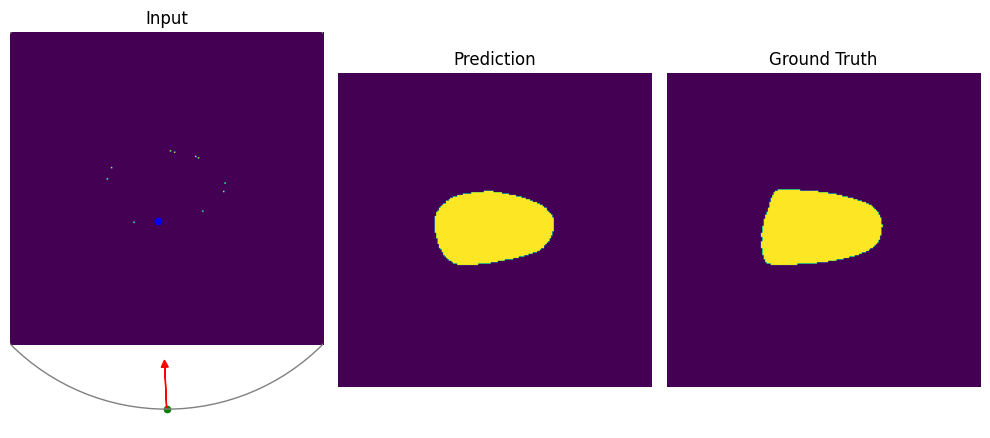

Current similarity : 0.9207792205400573
Episode 3:
  Action Taken: [1.         0.07338292]
  Reward Received: 0.9207792205400573
  Done: False, Truncated: False


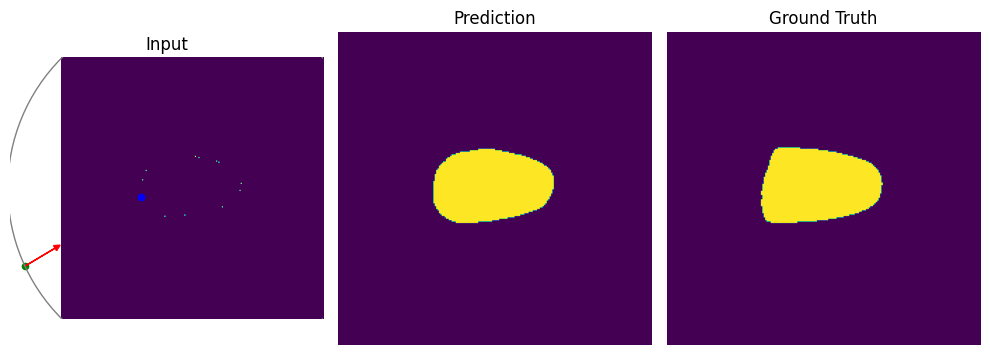

Current similarity : 0.9403681615399616
Episode 3:
  Action Taken: [0.6385389  0.16732207]
  Reward Received: 0.9403681615399616
  Done: False, Truncated: False


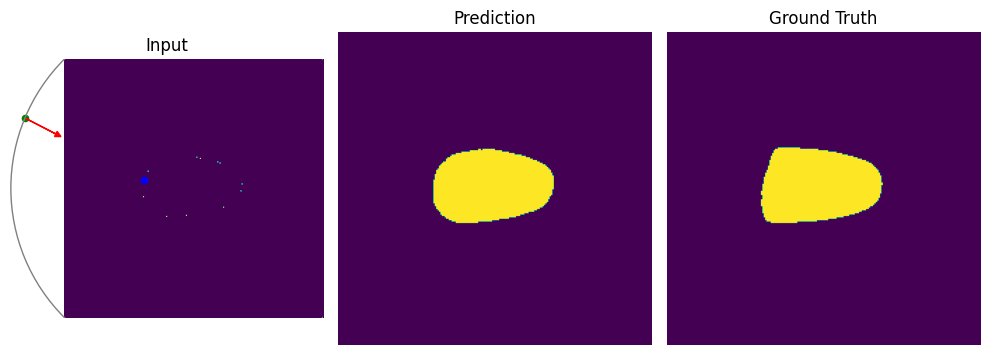

Current similarity : 0.9383898522033679
Episode 3:
  Action Taken: [ 0.37425405 -0.13088131]
  Reward Received: 0.9383898522033679
  Done: False, Truncated: False


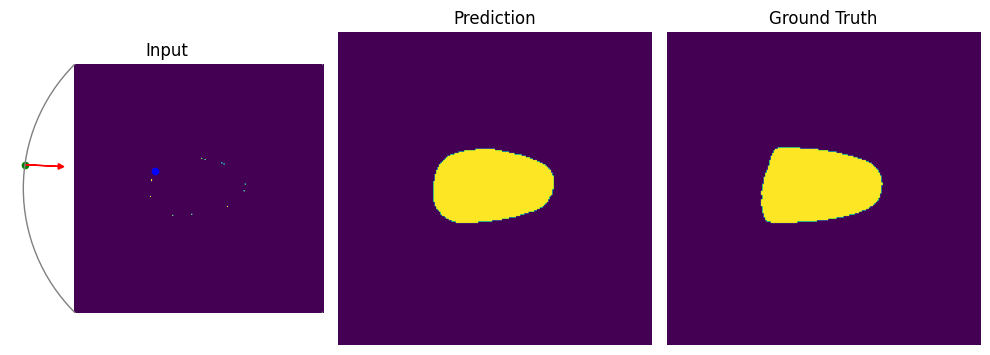

Current similarity : 0.9423176407288366
Episode 3:
  Action Taken: [0.45692766 0.13600299]
  Reward Received: 0.9423176407288366
  Done: False, Truncated: False


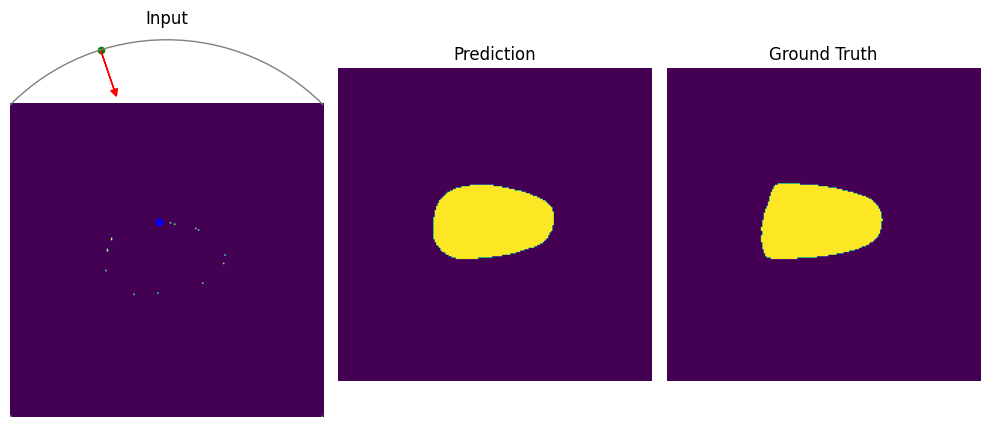

Current similarity : 0.9446599428640652
Episode 3:
  Action Taken: [0.09680711 0.03721509]
  Reward Received: 0.9446599428640652
  Done: True, Truncated: False
Episode 3 finished. Resetting environment...


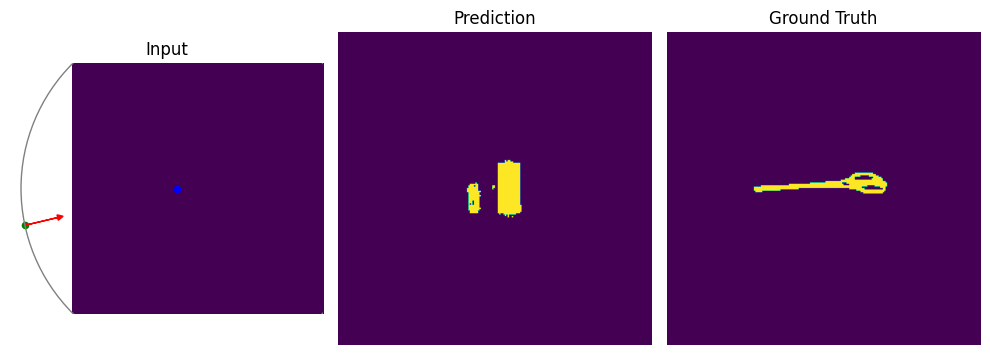

Current similarity : 0.08850289488130446
Episode 4:
  Action Taken: [0.56707734 0.0354279 ]
  Reward Received: 0.08850289488130446
  Done: False, Truncated: False


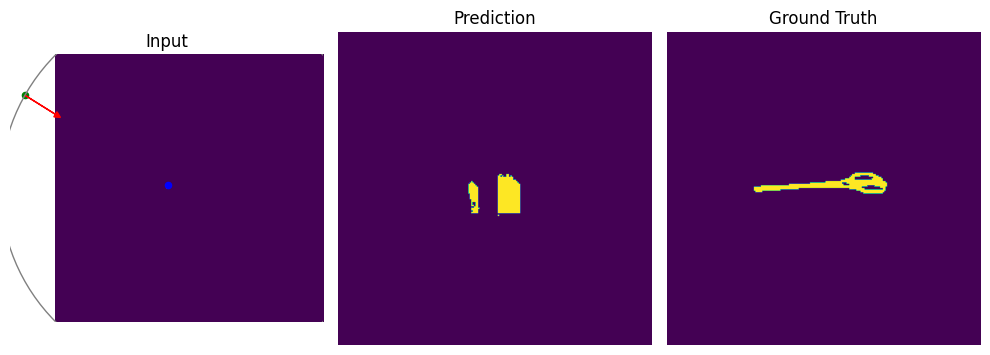

Current similarity : 0.09359104771760829
Episode 4:
  Action Taken: [ 0.3359178  -0.07036162]
  Reward Received: 0.09359104771760829
  Done: False, Truncated: False


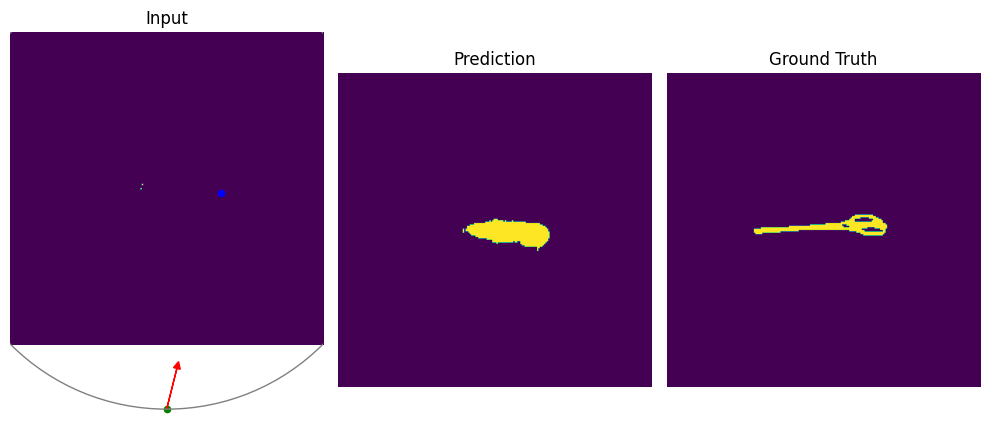

Current similarity : 0.26851851826989026
Episode 4:
  Action Taken: [-1.         -0.39950332]
  Reward Received: 0.26851851826989026
  Done: False, Truncated: False


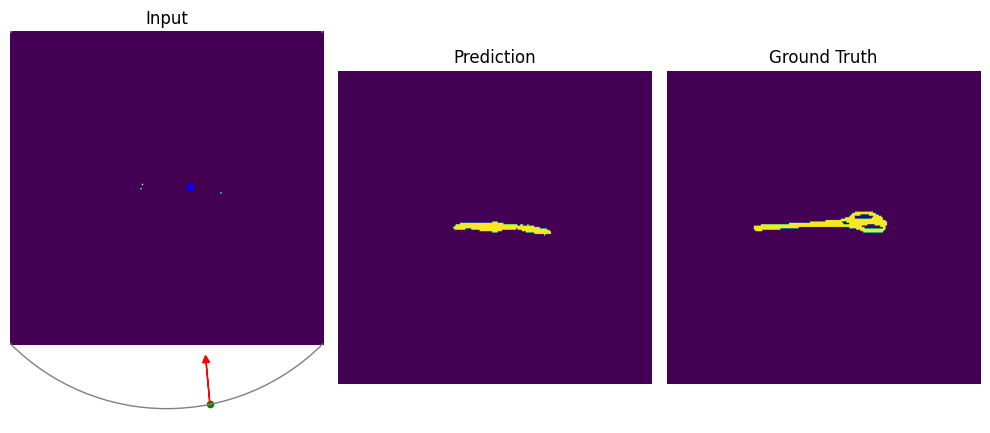

Current similarity : 0.2941176466262976
Episode 4:
  Action Taken: [-0.93715966 -0.1734515 ]
  Reward Received: 0.2941176466262976
  Done: False, Truncated: False


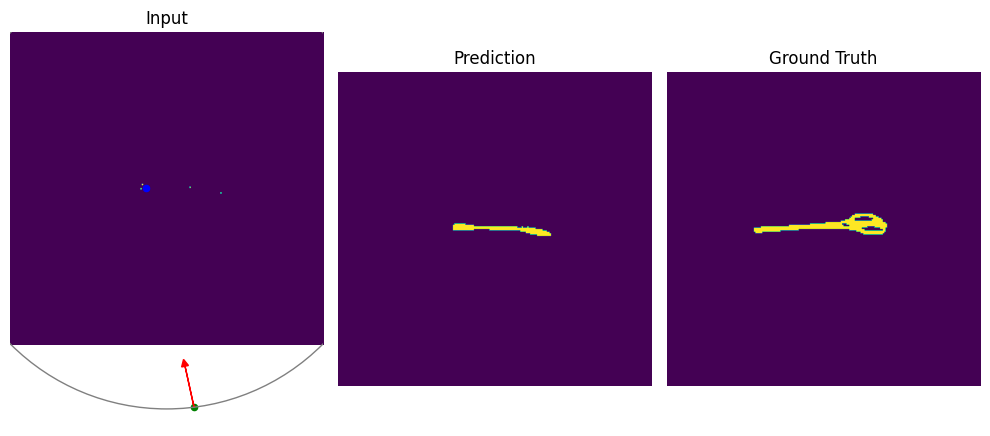

Current similarity : 0.2882736151656782
Episode 4:
  Action Taken: [-0.9603924   0.14890236]
  Reward Received: 0.2882736151656782
  Done: False, Truncated: False


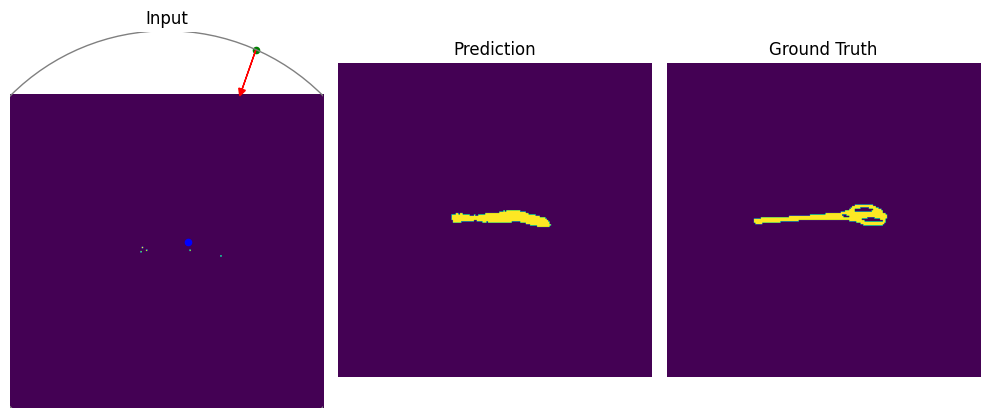

Current similarity : 0.43521126699266016
Episode 4:
  Action Taken: [-0.132671   0.1290878]
  Reward Received: 0.43521126699266016
  Done: False, Truncated: False


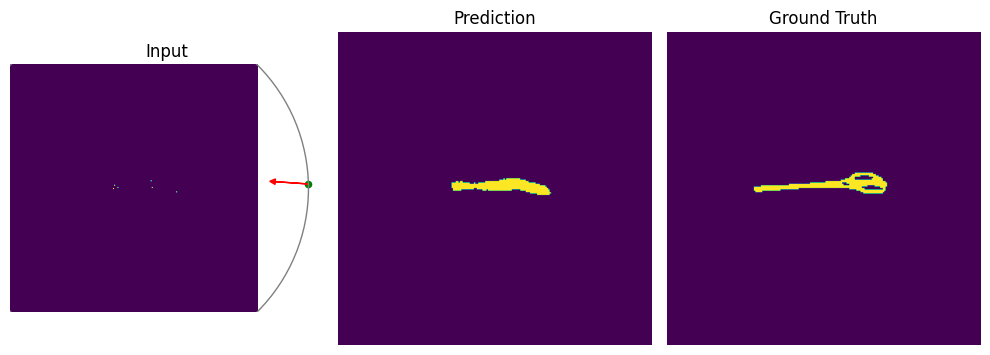

Current similarity : 0.43521126699266016
Episode 4:
  Action Taken: [-0.49204764 -0.15323645]
  Reward Received: 0
  Done: False, Truncated: False


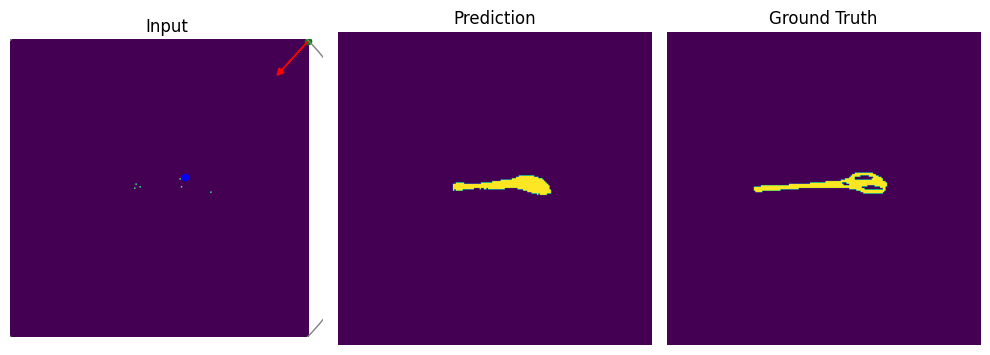

Current similarity : 0.5430267054257764
Episode 4:
  Action Taken: [-0.25178567  0.0867272 ]
  Reward Received: 0.5430267054257764
  Done: False, Truncated: False


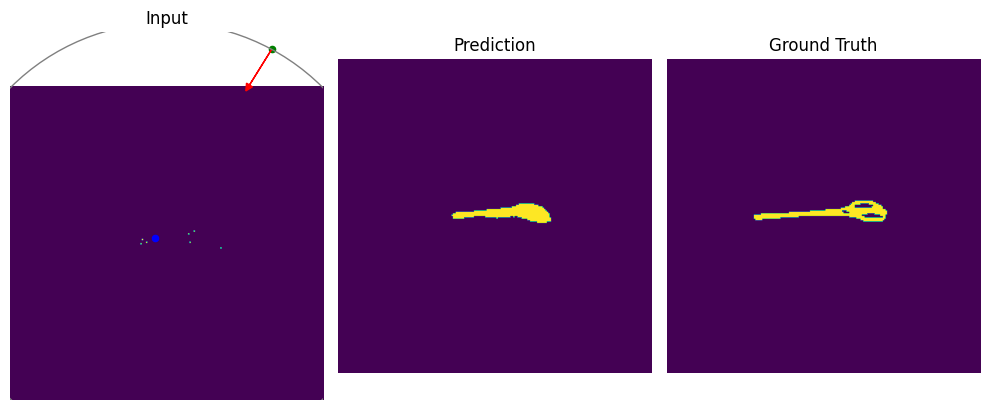

Current similarity : 0.5357664225755234
Episode 4:
  Action Taken: [-0.15792972 -0.09821858]
  Reward Received: 0.5357664225755234
  Done: False, Truncated: False


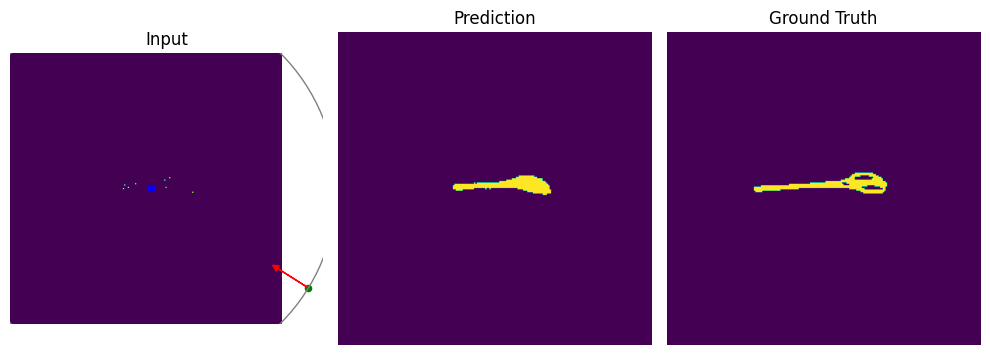

Current similarity : 0.5627906968018749
Episode 4:
  Action Taken: [-0.67472804 -0.0243895 ]
  Reward Received: 0.5627906968018749
  Done: False, Truncated: False


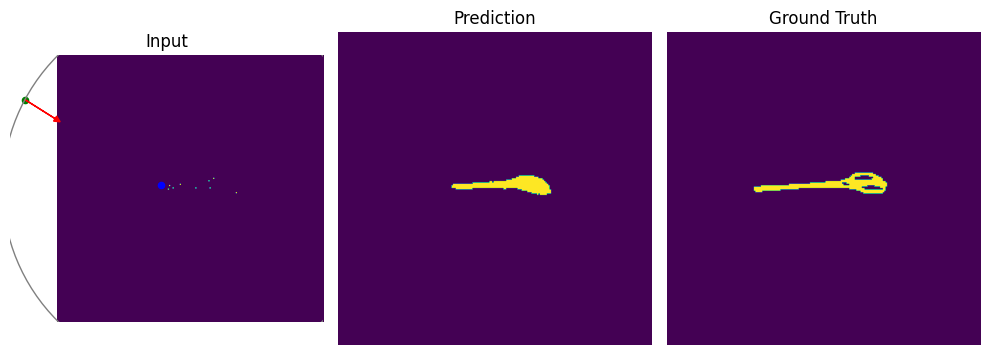

Current similarity : 0.561349692390568
Episode 4:
  Action Taken: [ 0.3431463  -0.11237181]
  Reward Received: 0.561349692390568
  Done: False, Truncated: False


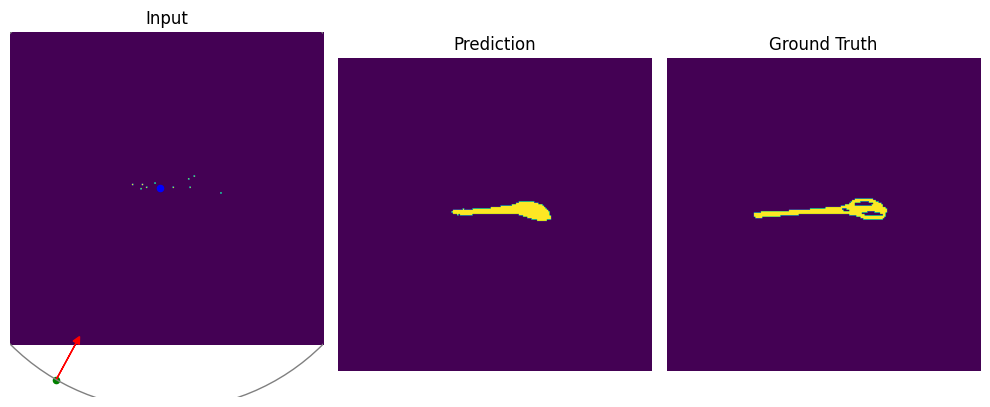

Current similarity : 0.555045870710939
Episode 4:
  Action Taken: [0.8330705  0.04469217]
  Reward Received: 0.555045870710939
  Done: False, Truncated: False


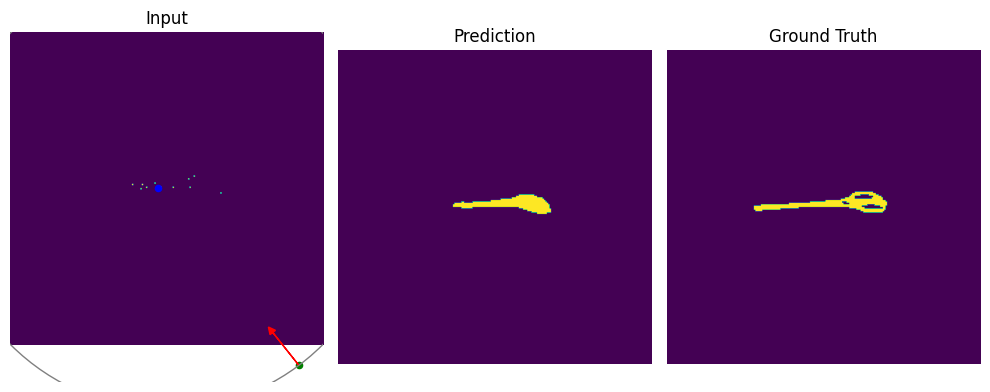

Current similarity : 0.5513016836886651
Episode 4:
  Action Taken: [-0.79537296  0.04762625]
  Reward Received: 0.5513016836886651
  Done: False, Truncated: False


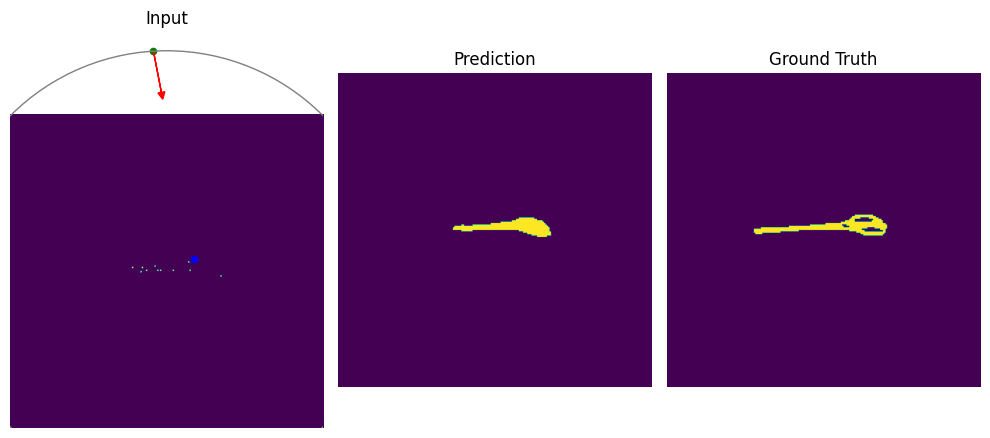

Current similarity : 0.5513016836886651
Episode 4:
  Action Taken: [0.01911142 0.21262696]
  Reward Received: 0.5513016836886651
  Done: False, Truncated: False


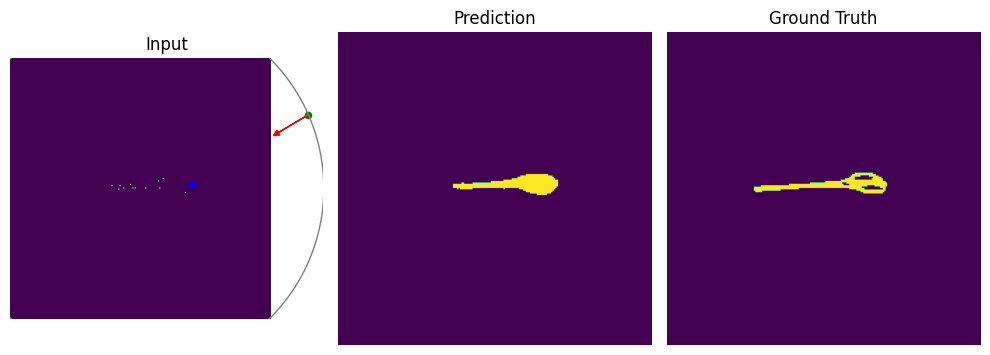

Current similarity : 0.6548148138447188
Episode 4:
  Action Taken: [-0.3686107   0.20148656]
  Reward Received: 0.6548148138447188
  Done: True, Truncated: False
Episode 4 finished. Resetting environment...


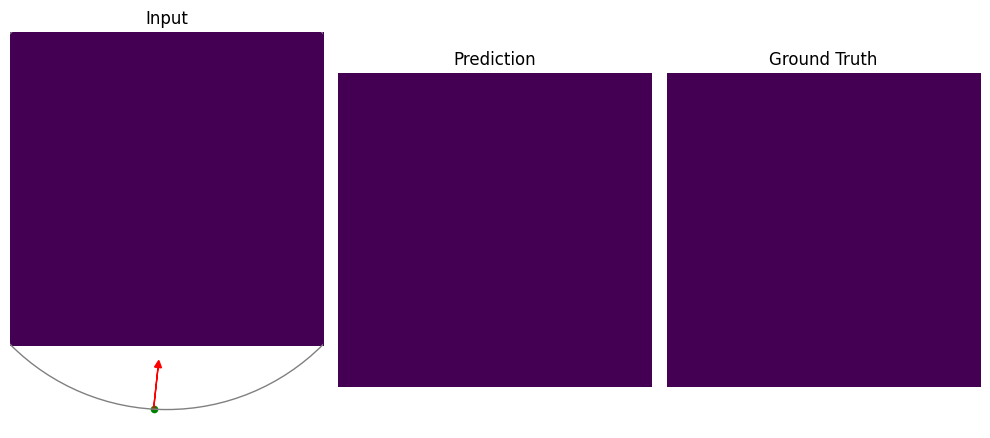

Current similarity : 0
Episode 5:
  Action Taken: [ 0.9810983  -0.07582787]
  Reward Received: 0
  Done: False, Truncated: False


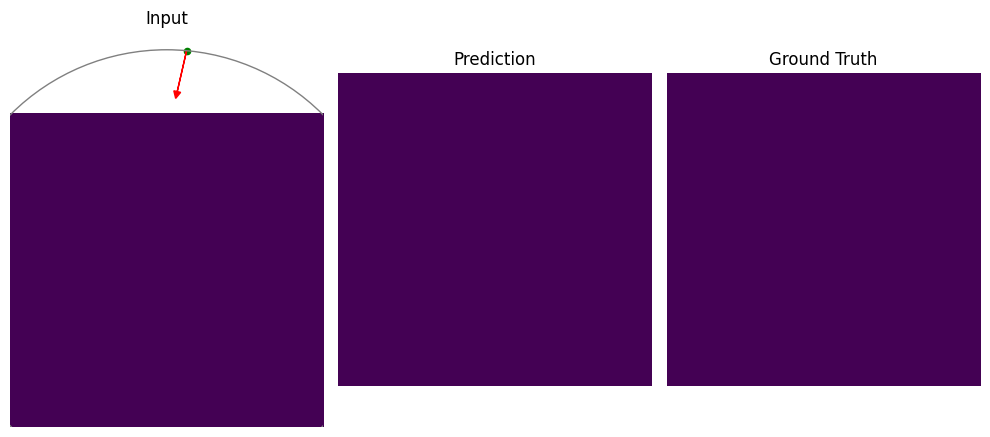

Current similarity : 0
Episode 5:
  Action Taken: [-0.02882942 -0.21910565]
  Reward Received: 0
  Done: False, Truncated: False


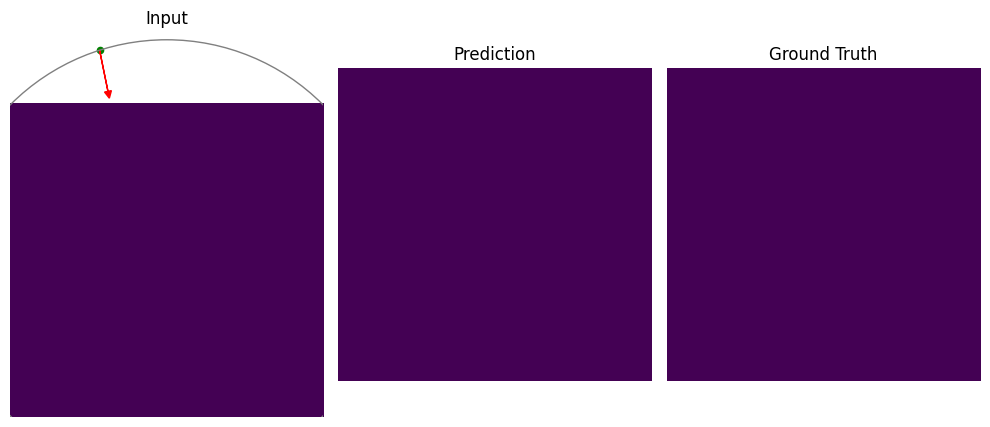

Current similarity : 0
Episode 5:
  Action Taken: [ 0.09837049 -0.17583163]
  Reward Received: 0
  Done: False, Truncated: False


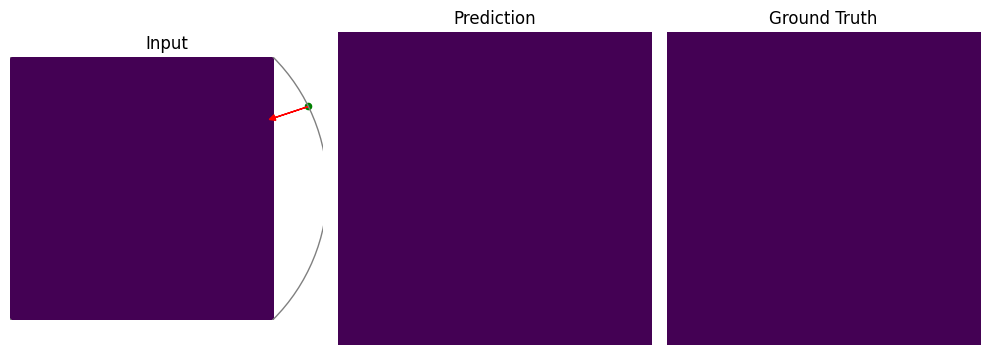

Current similarity : 0
Episode 5:
  Action Taken: [-0.35464674 -0.22192343]
  Reward Received: 0
  Done: False, Truncated: False


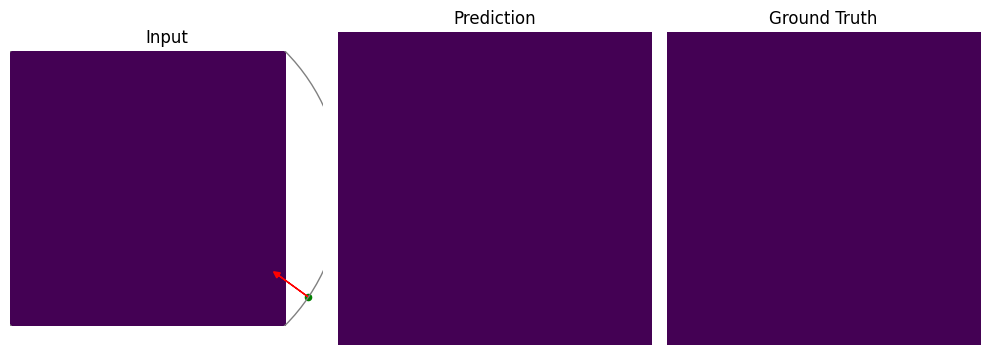

Current similarity : 0
Episode 5:
  Action Taken: [-0.68947476 -0.05497155]
  Reward Received: 0
  Done: False, Truncated: False


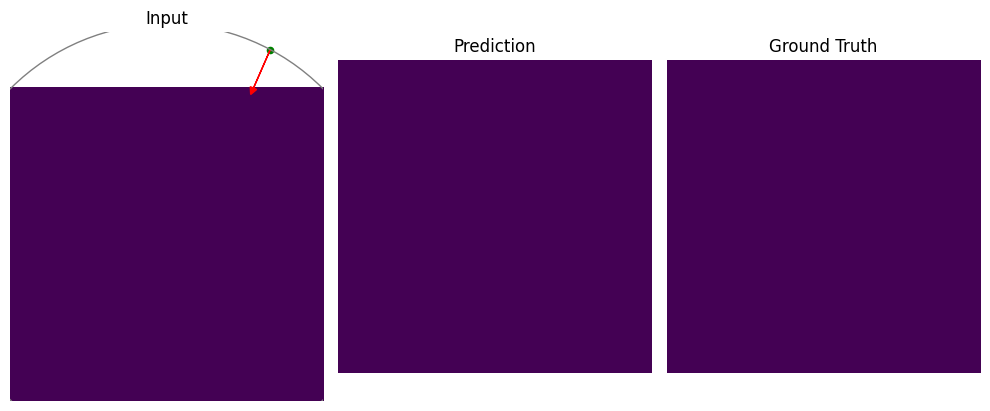

Current similarity : 0
Episode 5:
  Action Taken: [-0.15564796  0.12555113]
  Reward Received: 0
  Done: False, Truncated: False


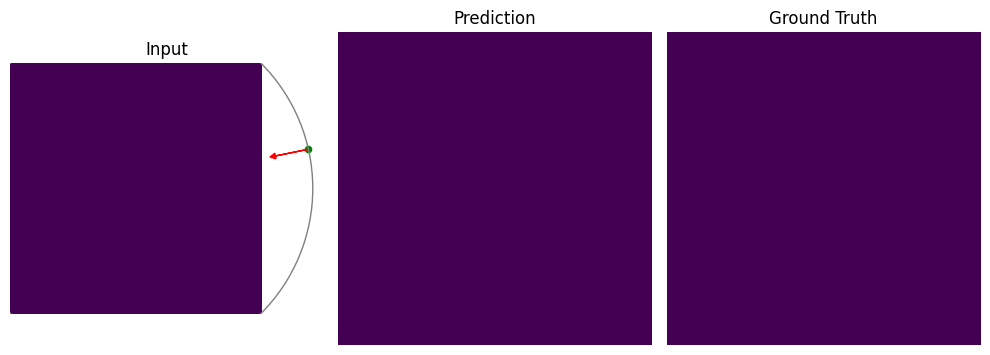

Current similarity : 0
Episode 5:
  Action Taken: [-0.4291522  -0.03524913]
  Reward Received: 0
  Done: False, Truncated: False


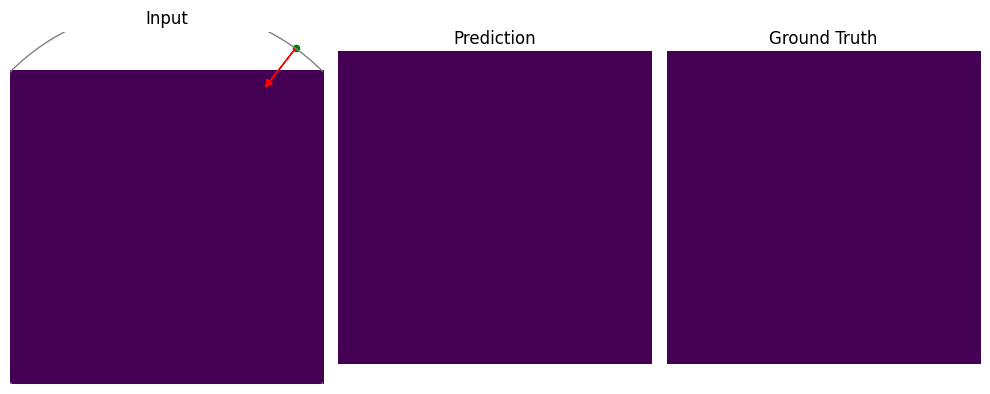

Current similarity : 0
Episode 5:
  Action Taken: [-0.19858682 -0.06152635]
  Reward Received: 0
  Done: False, Truncated: False


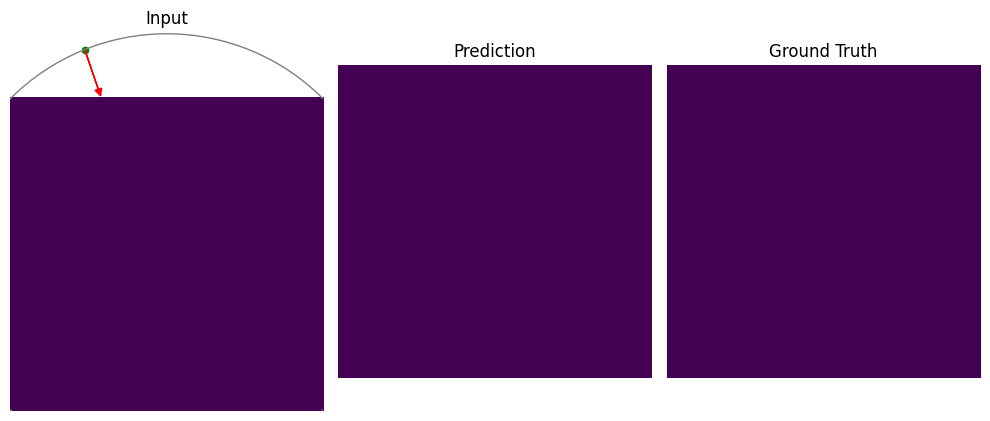

Current similarity : 0
Episode 5:
  Action Taken: [ 0.12117545 -0.08230038]
  Reward Received: 0
  Done: False, Truncated: False


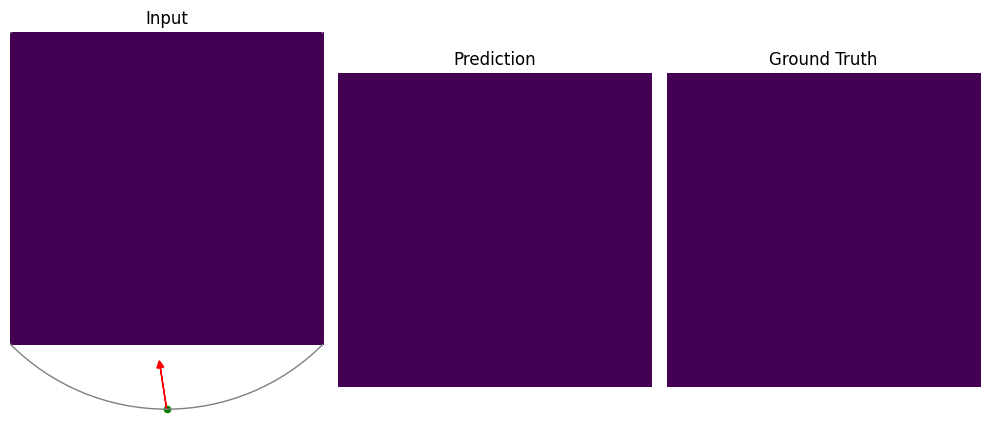

Current similarity : 0
Episode 5:
  Action Taken: [-1.         0.2468088]
  Reward Received: 0
  Done: False, Truncated: False


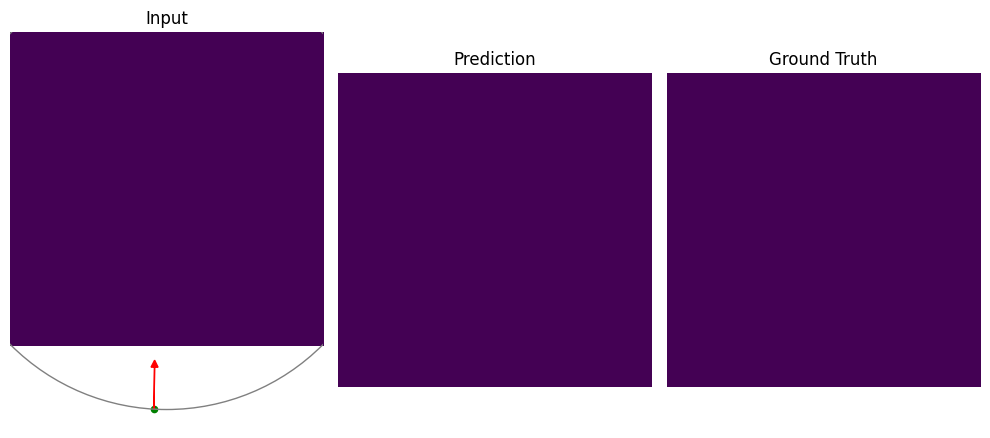

Current similarity : 0
Episode 5:
  Action Taken: [0.9818014  0.07417451]
  Reward Received: 0
  Done: False, Truncated: False


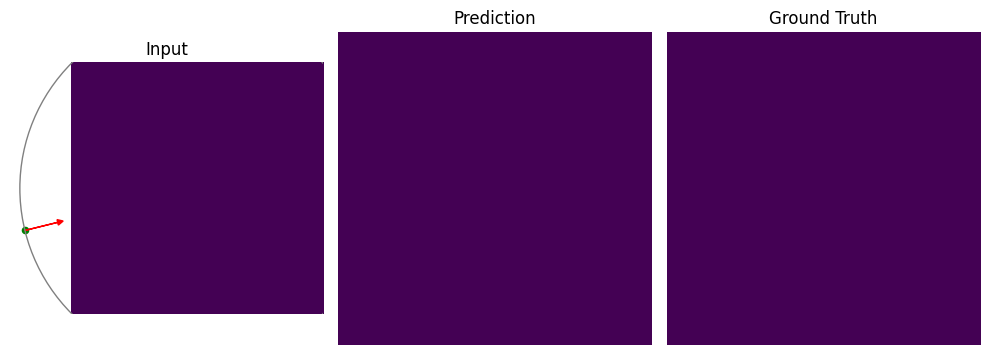

Current similarity : 0
Episode 5:
  Action Taken: [0.57625294 0.00319688]
  Reward Received: 0
  Done: False, Truncated: False


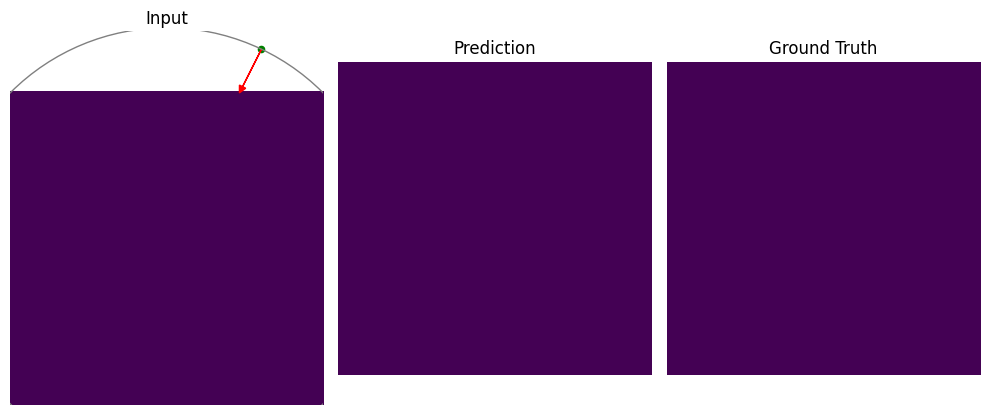

Current similarity : 0
Episode 5:
  Action Taken: [-0.14144127 -0.03740183]
  Reward Received: 0
  Done: False, Truncated: False


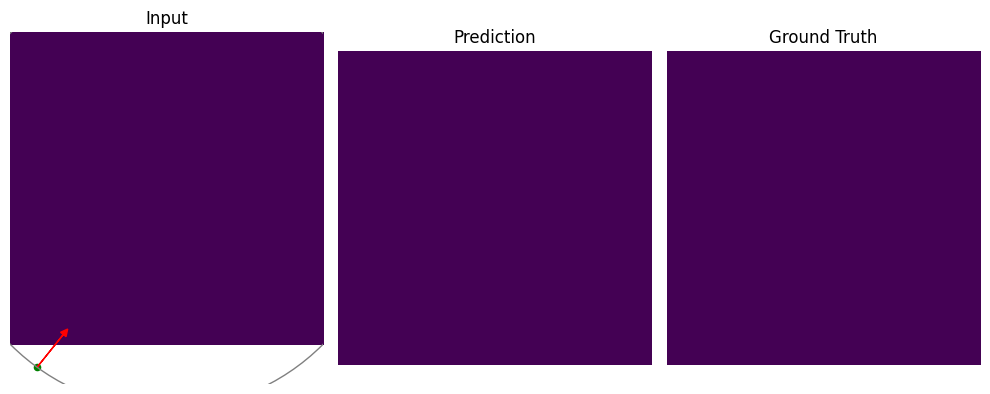

Current similarity : 0
Episode 5:
  Action Taken: [ 0.80010635 -0.07651746]
  Reward Received: 0
  Done: False, Truncated: False


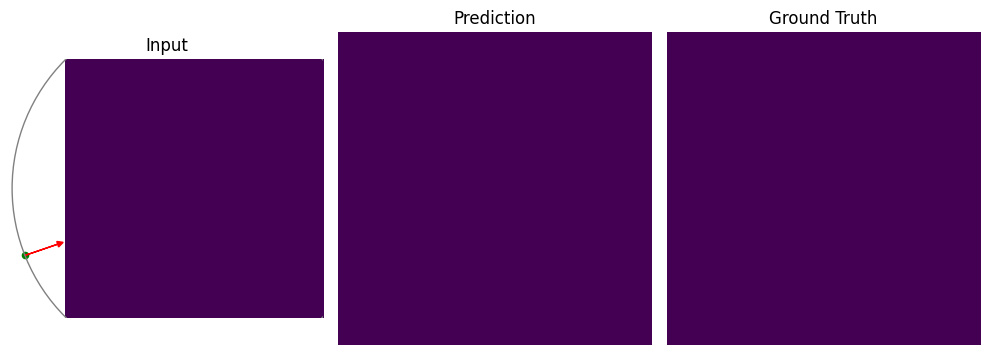

Current similarity : 0
Episode 5:
  Action Taken: [ 0.6201799  -0.07796599]
  Reward Received: 0
  Done: True, Truncated: False
Episode 5 finished. Resetting environment...
All episodes completed. Exiting...


In [4]:
num_episodes = 5
counter = 0

print(f"Starting environment rendering for {num_episodes} episodes...")
obs, info = env.reset()
while counter < num_episodes:
    # Get action from the model based on the current observation
    action, _ = loaded_model.predict(obs, deterministic=False)
    #action = random_agent.get_action()
    obs, reward, done, truncated, info = env.step(action)

    env.render()  # Render the environment for visualization

    # Provide feedback to the user
    print(f"Episode {counter + 1}:")
    print(f"  Action Taken: {action}")
    print(f"  Reward Received: {reward}")
    print(f"  Done: {done}, Truncated: {truncated}")

    if done or truncated:
        print(f"Episode {counter + 1} finished. Resetting environment...")
        counter += 1
        obs, info = env.reset()

print("All episodes completed. Exiting...")

env.close()